## MILESTONE 1


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the csv file using the pandas
import pandas as pd
df = pd.read_csv("H2HBABBA2501.csv")
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S foundation,2019-03-05 00:00:00,2019.0,1.928809e+09,2019-02-18,20190216,20190218,20190305.0,USD,RV,1.0,NaN,53184.36,20190218.0,NAA8,1.928809e+09,0
1,U001,0200776463,KROGE trust,2019-07-22 00:00:00,2019.0,1.929581e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,NaN,7134.36,20190705.0,NAA8,1.929581e+09,0
2,CA02,0140104331,CORE-M systems,2019-04-05 00:00:00,2019.0,2.960537e+09,2019-03-26,20190326,20190326,20190413.0,CAD,RV,1.0,NaN,3830.40,20190403.0,CA10,2.960537e+09,0
3,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,USD,RV,1.0,NaN,5983.36,20200427.0,NAH4,1.930832e+09,1
4,U001,0200418007,AM co,2020-02-28 00:00:00,2020.0,1.930517e+09,2020-02-13,20200212,20200213,20200228.0,USD,RV,1.0,NaN,148524.00,20200213.0,NAA8,1.930517e+09,0


In [3]:
#Count of null values in a column
df.isnull().sum(axis=0)

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [4]:
#Count of null values in row
df.isnull().sum(axis=1) 


0        1
1        1
2        1
3        2
4        1
        ..
49995    1
49996    1
49997    2
49998    1
49999    1
Length: 50000, dtype: int64

In [5]:
#Dropping the area_Business column as it has null values
df.drop(columns = ['area_business'], inplace = True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S foundation,2019-03-05 00:00:00,2019.0,1.928809e+09,2019-02-18,20190216,20190218,20190305.0,USD,RV,1.0,53184.36,20190218.0,NAA8,1.928809e+09,0
1,U001,0200776463,KROGE trust,2019-07-22 00:00:00,2019.0,1.929581e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,7134.36,20190705.0,NAA8,1.929581e+09,0
2,CA02,0140104331,CORE-M systems,2019-04-05 00:00:00,2019.0,2.960537e+09,2019-03-26,20190326,20190326,20190413.0,CAD,RV,1.0,3830.40,20190403.0,CA10,2.960537e+09,0
3,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,USD,RV,1.0,5983.36,20200427.0,NAH4,1.930832e+09,1
4,U001,0200418007,AM co,2020-02-28 00:00:00,2020.0,1.930517e+09,2020-02-13,20200212,20200213,20200228.0,USD,RV,1.0,148524.00,20200213.0,NAA8,1.930517e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200706844,WINC trust,2019-08-09 00:00:00,2019.0,1.929655e+09,2019-07-25,20190724,20190725,20190809.0,USD,RV,1.0,30914.79,20190725.0,NAA8,1.929655e+09,0
49996,U001,0200942148,BRADY llc,2019-05-17 00:00:00,2019.0,1.928998e+09,2019-03-08,20190320,20190308,20190407.0,USD,RV,1.0,16768.80,20190308.0,NAD5,1.928998e+09,0
49997,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930724e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,15610.71,20200331.0,NAH4,1.930724e+09,1
49998,U001,0200782001,GORDO,2019-05-14 00:00:00,2019.0,1.929237e+09,2019-05-01,20190430,20190501,20190516.0,USD,RV,1.0,52720.91,20190501.0,NAA8,1.929237e+09,0


In [6]:
df.isna().sum() 

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

In [7]:
#Slicing the records with clear_date Null into a separate Dataframe
main_test = df[df.clear_date.isnull()==False]
real_test = df[df.clear_date.isnull()]
real_test



,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,USD,RV,1.0,5983.36,20200427.0,NAH4,1.930832e+09,1
6,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930832e+09,2020-04-29,20200428,20200429,20200514.0,USD,RV,1.0,17360.34,20200429.0,NAH4,1.930832e+09,1
7,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930638e+09,2020-03-13,20200311,20200313,20200328.0,USD,RV,1.0,63868.67,20200313.0,NAH4,1.930638e+09,1
8,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930794e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,14095.14,20200417.0,NAH4,1.930794e+09,1
12,U001,0200747369,SCHNU in,NaN,2020.0,1.930741e+09,2020-04-03,20200403,20200403,20200418.0,USD,RV,1.0,16815.20,20200403.0,NAA8,1.930741e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,U001,0200707822,PUBLI associates,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,USD,RV,1.0,49770.76,20200415.0,NAA8,1.930794e+09,1
49963,U001,0200706844,WINC associates,NaN,2020.0,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,USD,RV,1.0,35304.38,20200506.0,NAA8,1.930867e+09,1
49977,U001,0200744019,TARG corp,NaN,2020.0,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,USD,RV,1.0,4038.33,20200423.0,NAA8,1.930814e+09,1
49983,U001,0200418007,AM corporation,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,USD,RV,1.0,42708.70,20200420.0,NAA8,1.930801e+09,1


In [8]:
#Data with clearing date as null
real_test.shape

(10000, 18)

In [9]:
#Remaining data where clear_date is not null

main_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S foundation,2019-03-05 00:00:00,2019.0,1.928809e+09,2019-02-18,20190216,20190218,20190305.0,USD,RV,1.0,53184.36,20190218.0,NAA8,1.928809e+09,0
1,U001,0200776463,KROGE trust,2019-07-22 00:00:00,2019.0,1.929581e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,7134.36,20190705.0,NAA8,1.929581e+09,0
2,CA02,0140104331,CORE-M systems,2019-04-05 00:00:00,2019.0,2.960537e+09,2019-03-26,20190326,20190326,20190413.0,CAD,RV,1.0,3830.40,20190403.0,CA10,2.960537e+09,0
4,U001,0200418007,AM co,2020-02-28 00:00:00,2020.0,1.930517e+09,2020-02-13,20200212,20200213,20200228.0,USD,RV,1.0,148524.00,20200213.0,NAA8,1.930517e+09,0
5,U001,0200705742,DOT us,2020-03-11 00:00:00,2020.0,1.930571e+09,2020-02-25,20200226,20200225,20200311.0,USD,RV,1.0,9135.57,20200225.0,NAA8,1.930571e+09,0


In [10]:
#Remaining data after clearing date null
main_test.shape

(40000, 18)

In [11]:
main_test.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                2
isOpen                    0
dtype: int64

### DATA-PREPROCESSING

### NULL IMPLEMENTATION

In [12]:
##NULL IMPLEMENTATION
main_test[main_test.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6077,CA02,0100054349,PURITY L corporation,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190315,20190325.0,CAD,X2,1.0,631.8,20190315.0,CA10,NaN,0
8756,CA02,0140104429,COSTCO systems,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.2,20190311.0,CA10,NaN,0


In [13]:
##Dropping the record invoice_id containing the null value 
main_test = main_test[main_test.invoice_id.isnull()==False]

In [14]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39998 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39998 non-null  object 
 1   cust_number             39998 non-null  object 
 2   name_customer           39998 non-null  object 
 3   clear_date              39998 non-null  object 
 4   buisness_year           39998 non-null  float64
 5   doc_id                  39998 non-null  float64
 6   posting_date            39998 non-null  object 
 7   document_create_date    39998 non-null  int64  
 8   document_create_date.1  39998 non-null  int64  
 9   due_in_date             39998 non-null  float64
 10  invoice_currency        39998 non-null  object 
 11  document type           39998 non-null  object 
 12  posting_id              39998 non-null  float64
 13  total_open_amount       39998 non-null  float64
 14  baseline_create_date    39998 non-null

#### DATE CONVERSION

In [15]:
###DATE CONVERSION
#document_create_date is converted into date format
main_test['document_create_date'] = pd.to_datetime(main_test['document_create_date'], format='%Y%m%d')
#baseline_create_date is converted into a date format
main_test['baseline_create_date'] = pd.to_datetime(main_test['baseline_create_date'], format='%Y%m%d')
#due_in_date is converted into date format
main_test['due_in_date'] = pd.to_datetime(main_test['due_in_date'], format='%Y%m%d')
#document_create_date.1 is convereted into date format
main_test['document_create_date.1'] = pd.to_datetime(main_test['document_create_date.1'], format='%Y%m%d')
main_test['clear_date'] = pd.to_datetime(main_test['clear_date'])
main_test['posting_date'] = pd.to_datetime(main_test['posting_date'])
#data frame is printed

main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707005,KING S foundation,2019-03-05,2019.0,1.928809e+09,2019-02-18,2019-02-16,2019-02-18,2019-03-05,USD,RV,1.0,53184.36,2019-02-18,NAA8,1.928809e+09,0
1,U001,0200776463,KROGE trust,2019-07-22,2019.0,1.929581e+09,2019-07-05,2019-07-05,2019-07-05,2019-07-20,USD,RV,1.0,7134.36,2019-07-05,NAA8,1.929581e+09,0
2,CA02,0140104331,CORE-M systems,2019-04-05,2019.0,2.960537e+09,2019-03-26,2019-03-26,2019-03-26,2019-04-13,CAD,RV,1.0,3830.40,2019-04-03,CA10,2.960537e+09,0
4,U001,0200418007,AM co,2020-02-28,2020.0,1.930517e+09,2020-02-13,2020-02-12,2020-02-13,2020-02-28,USD,RV,1.0,148524.00,2020-02-13,NAA8,1.930517e+09,0
5,U001,0200705742,DOT us,2020-03-11,2020.0,1.930571e+09,2020-02-25,2020-02-26,2020-02-25,2020-03-11,USD,RV,1.0,9135.57,2020-02-25,NAA8,1.930571e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200752302,KROGER llc,2019-05-28,2019.0,1.929302e+09,2019-05-12,2019-05-12,2019-05-12,2019-05-27,USD,RV,1.0,173604.36,2019-05-12,NAA8,1.929302e+09,0
49995,U001,0200706844,WINC trust,2019-08-09,2019.0,1.929655e+09,2019-07-25,2019-07-24,2019-07-25,2019-08-09,USD,RV,1.0,30914.79,2019-07-25,NAA8,1.929655e+09,0
49996,U001,0200942148,BRADY llc,2019-05-17,2019.0,1.928998e+09,2019-03-08,2019-03-20,2019-03-08,2019-04-07,USD,RV,1.0,16768.80,2019-03-08,NAD5,1.928998e+09,0
49998,U001,0200782001,GORDO,2019-05-14,2019.0,1.929237e+09,2019-05-01,2019-04-30,2019-05-01,2019-05-16,USD,RV,1.0,52720.91,2019-05-01,NAA8,1.929237e+09,0


#### DELETING CONSTANT FEATURES

In [16]:
const_feature = []
uniq_val_count = []
unique_cols = dict()
for col in list(main_test.columns):
    uniq_val_count.append(main_test[col].nunique())
    if(main_test[col].nunique()==1):
        const_feature.append(col)
    
print('\n\n\nConstant Features are   :',const_feature) ##columns with the constant features are dropped
print('\n\nALL FEATURES WITH UNIQUE VALUES : \n')
pd.DataFrame({'COLUMN NAMES':list(main_test.columns) ,'UNIQUE VALUES COUNT':uniq_val_count})

# Removing the constant feature
main_test=main_test.drop(columns=const_feature)




Constant Features are   : ['document type', 'posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



In [17]:
main_test.nunique()

business_code                 6
cust_number                1348
name_customer              3910
clear_date                  404
buisness_year                 2
doc_id                    39084
posting_date                424
document_create_date        426
document_create_date.1      424
due_in_date                 490
invoice_currency              2
total_open_amount         35606
baseline_create_date        434
cust_payment_terms           72
invoice_id                39084
dtype: int64

In [18]:
#Sorting the data in ascending order based on the posting_date column
main_test = main_test.sort_values(['posting_date']).reset_index(drop=True)
main_test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,38289.77,2018-12-30,NAH4,1.928542e+09
1,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,58902.42,2018-12-30,NAH4,1.928539e+09
2,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,27481.20,2018-12-30,NAH4,1.928538e+09
3,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928545e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,1764.66,2018-12-30,NAH4,1.928545e+09
4,U001,0200769623,WAL-MAR us,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,9655.40,2018-12-30,NAH4,1.928538e+09


In [19]:
# delay_date is the target column --> delay_date = clear_date - due_in_date
main_test['delay_date'] = main_test.loc[:,'clear_date'] - main_test.loc[:,'due_in_date']
main_test['delay_date'] = main_test['delay_date'].dt.days
main_test['delay_date']

0        -5
1        -5
2        -5
3        -5
4         3
         ..
39993     0
39994     2
39995    11
39996     3
39997     2
Name: delay_date, Length: 39998, dtype: int64

In [20]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39998 entries, 0 to 39997
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39998 non-null  object        
 1   cust_number             39998 non-null  object        
 2   name_customer           39998 non-null  object        
 3   clear_date              39998 non-null  datetime64[ns]
 4   buisness_year           39998 non-null  float64       
 5   doc_id                  39998 non-null  float64       
 6   posting_date            39998 non-null  datetime64[ns]
 7   document_create_date    39998 non-null  datetime64[ns]
 8   document_create_date.1  39998 non-null  datetime64[ns]
 9   due_in_date             39998 non-null  datetime64[ns]
 10  invoice_currency        39998 non-null  object        
 11  total_open_amount       39998 non-null  float64       
 12  baseline_create_date    39998 non-null  dateti

In [21]:
##class function is used for label encoding
class LabelEncoderExt(object):
    def _init_(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in py.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)


In [22]:
#label encoding for the main_test dataframe
list_cust_details = ['cust_number','name_customer','business_code','cust_payment_terms','invoice_currency']

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoder()
    label_encoder.fit(main_test[list_cust_details[col]])
    main_test[list_cust_details[col]] = label_encoder.transform(main_test[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [23]:
##label encoding for the rest_test dataframe
list_cust_details = ['cust_number','name_customer','business_code','cust_payment_terms','invoice_currency']

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoder()
    label_encoder.fit(real_test[list_cust_details[col]])
    real_test[list_cust_details[col]] = label_encoder.transform(real_test[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [24]:
for col in list_cust_details:
    print(col,"   :     \n",df[col].unique(),"   \n     \n")

cust_number    :     
 ['0200707005' '0200776463' '0140104331' ... '0100010880' '0200742492'
 '200899778']    
     

name_customer    :     
 ['KING S foundation' 'KROGE trust' 'CORE-M systems' ... 'KETTL '
 'HEARTHSI systems' 'GLOBA us']    
     

business_code    :     
 ['U001' 'CA02' 'U013' 'U002' 'U005' 'U007']    
     

cust_payment_terms    :     
 ['NAA8' 'CA10' 'NAH4' 'NAVE' 'NAM4' 'NAU5' 'NAVF' 'NAM2' 'NAM1' 'NAD1'
 'NAC6' 'NAAX' 'NA32' 'NAG2' 'NAD5' 'NAGD' 'NAWU' 'NAX2' 'NA10' 'NAUZ'
 'NAWN' 'NAAW' 'CAB1' 'NAVM' 'NA38' 'NAVQ' 'NAV2' 'NATX' 'NABG' 'NA9X'
 'NAWP' 'NAUP' 'NAB1' 'NAVR' 'NAVD' 'NA31' 'NA84' 'CA30' 'NACB' 'NAVL'
 'NATL' 'NA3B' 'NA25' 'NA3F' 'NAM3' 'NATU' 'CA60' 'NAV9' 'BR56' 'NAVC'
 'C106' '90M7' 'BR12' 'NATK' 'NA8Q' 'NAD4' 'CAX2' 'NATV' 'NATH' 'NATZ'
 'NAD8' 'NAWM' 'NACG' 'C129' 'NACE' 'NATY' 'NAUN' 'B052' 'NATM' 'NANC'
 'NATJ' 'NAUI' 'NABD']    
     

invoice_currency    :     
 ['USD' 'CAD']    
     



# MILESTONE 2

### SPLITTING THE DATA

In [25]:
# Converting the main_test into X and y so that we can pass it onto train_test_split function
# X contains the dataframe without the target i.e delay_date
X = main_test.drop('delay_date',axis=1)
# Y contains only the target value
y = main_test['delay_date']

In [26]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
#training the data
X_train,X_data_test,y_train,y_data_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [27]:
#validation and testing the data
X_val,X_test,y_val,y_test = train_test_split(X_data_test,y_data_test,test_size=0.5,random_state=0 , shuffle = False)

In [28]:
X_train.shape , X_val.shape , X_test.shape

((27998, 15), (6000, 15), (6000, 15))

## EDA

<AxesSubplot:xlabel='delay_date', ylabel='Density'>

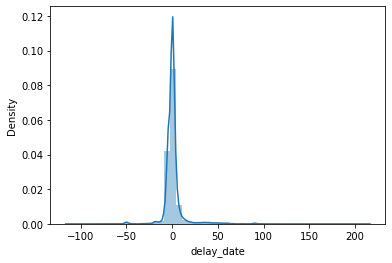

In [29]:
# distribution of the target column 
import seaborn as sns
#right skewed distribution
sns.distplot(y_train)

In [30]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay_date
0,0,1,841,3774,2019-01-09,2019.0,1.928542e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,1,38289.77,2018-12-30,36,1.928542e+09,-5
1,1,1,841,3776,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,58902.42,2018-12-30,36,1.928539e+09,-5
2,2,1,841,3782,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,27481.20,2018-12-30,36,1.928538e+09,-5
3,3,1,841,3773,2019-01-09,2019.0,1.928545e+09,2018-12-30,2018-12-31,2018-12-30,2019-01-14,1,1764.66,2018-12-30,36,1.928545e+09,-5
4,4,1,841,3783,2019-01-17,2019.0,1.928538e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,1,9655.40,2018-12-30,36,1.928538e+09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27993,27993,1,927,909,2019-10-16,2019.0,1.929983e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-24,1,6420.54,2019-10-01,40,1.929983e+09,-8
27994,27994,1,927,907,2019-10-16,2019.0,1.929982e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-24,1,1704.65,2019-10-01,40,1.929982e+09,-8
27995,27995,1,1347,1970,2019-11-27,2019.0,1.929984e+09,2019-10-08,2019-10-08,2019-10-08,2019-10-08,1,17080.00,2019-10-08,71,1.929984e+09,50
27996,27996,1,818,3033,2019-10-31,2019.0,1.929975e+09,2019-10-08,2019-10-06,2019-10-08,2019-10-23,1,14257.87,2019-10-08,36,1.929975e+09,8


<AxesSubplot:xlabel='delay_date', ylabel='posting_date'>

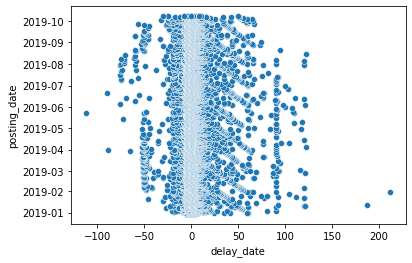

In [31]:
#scattering points
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_date", y="posting_date")

<AxesSubplot:xlabel='total_open_amount', ylabel='invoice_id'>

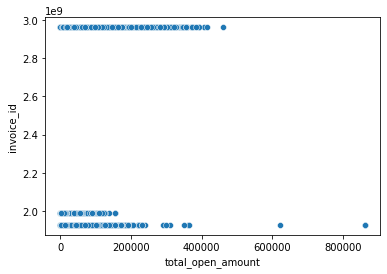

In [32]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="total_open_amount", y="invoice_id")

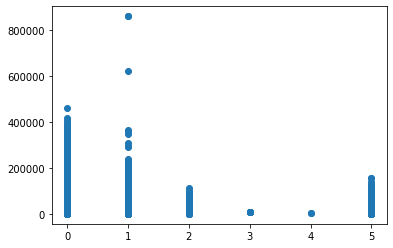

In [33]:

import  matplotlib.pyplot as plt
plt.scatter(X_train.business_code,X_train.total_open_amount)


## FEATURE ENGINEERING

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 27997
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27998 non-null  int32         
 1   cust_number             27998 non-null  int32         
 2   name_customer           27998 non-null  int32         
 3   clear_date              27998 non-null  datetime64[ns]
 4   buisness_year           27998 non-null  float64       
 5   doc_id                  27998 non-null  float64       
 6   posting_date            27998 non-null  datetime64[ns]
 7   document_create_date    27998 non-null  datetime64[ns]
 8   document_create_date.1  27998 non-null  datetime64[ns]
 9   due_in_date             27998 non-null  datetime64[ns]
 10  invoice_currency        27998 non-null  int32         
 11  total_open_amount       27998 non-null  float64       
 12  baseline_create_date    27998 non-null  dateti

In [35]:
# function will delete a column from train , val and test
def thanos_snap(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [36]:
# wrote a custom function to do a status check  on all the dataframes 
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [37]:
#clear_date
#to get week
X_train['day_of_week'] = X_train['clear_date'].dt.weekday 
X_val['day_of_week'] = X_val['clear_date'].dt.weekday 
X_test['day_of_week'] = X_test['clear_date'].dt.weekday
#to get day,month,year
X_train['day_of_clear_date'] = X_train['clear_date'].dt.day
X_train['month_of_clear_date'] = X_train['clear_date'].dt.month
X_train['year_of_clear_date'] = X_train['clear_date'].dt.year

X_val['day_of_clear_date'] = X_val['clear_date'].dt.day
X_val['month_of_clear_date'] = X_val['clear_date'].dt.month
X_val['year_of_clear_date'] = X_val['clear_date'].dt.year

X_test['day_of_clear_date'] = X_test['clear_date'].dt.day
X_test['month_of_clear_date'] = X_test['clear_date'].dt.month
X_test['year_of_clear_date'] = X_test['clear_date'].dt.year


In [38]:
X_train ,X_val, X_test = thanos_snap(['clear_date'])

In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 27997
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27998 non-null  int32         
 1   cust_number             27998 non-null  int32         
 2   name_customer           27998 non-null  int32         
 3   buisness_year           27998 non-null  float64       
 4   doc_id                  27998 non-null  float64       
 5   posting_date            27998 non-null  datetime64[ns]
 6   document_create_date    27998 non-null  datetime64[ns]
 7   document_create_date.1  27998 non-null  datetime64[ns]
 8   due_in_date             27998 non-null  datetime64[ns]
 9   invoice_currency        27998 non-null  int32         
 10  total_open_amount       27998 non-null  float64       
 11  baseline_create_date    27998 non-null  datetime64[ns]
 12  cust_payment_terms      27998 non-null  int32 

In [40]:
##baseline_create_date 
#to get week
X_train['day_of_week_baseline'] = X_train['baseline_create_date'].dt.weekday 
X_val['day_of_week_baseline'] = X_val['baseline_create_date'].dt.weekday 
X_test['day_of_week_baseline'] = X_test['baseline_create_date'].dt.weekday
#to get day,month,year
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year

X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year


In [41]:
X_train ,X_val, X_test = thanos_snap(['baseline_create_date'])

In [42]:
#due_in_date
#to get week
X_train['day_of_week_due'] = X_train['due_in_date'].dt.weekday 
X_val['day_of_week_due'] = X_val['due_in_date'].dt.weekday 
X_test['day_of_week_due'] = X_test['due_in_date'].dt.weekday
#to get day,month,year
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year

X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year


In [43]:
X_train ,X_val, X_test = thanos_snap(['due_in_date'])

In [44]:
#document_create_date
#to get week
X_train['day_of_week_document'] = X_train['document_create_date'].dt.weekday 
X_val['day_of_week_document'] = X_val['document_create_date'].dt.weekday 
X_test['day_of_week_document'] = X_test['document_create_date'].dt.weekday
#to get day,month,year
X_train['day_of_document'] = X_train['document_create_date'].dt.day
X_train['month_of_document'] = X_train['document_create_date'].dt.month
X_train['year_of_document'] = X_train['document_create_date'].dt.year

X_val['day_of_document'] = X_val['document_create_date'].dt.day
X_val['month_of_document'] = X_val['document_create_date'].dt.month
X_val['year_of_document'] = X_val['document_create_date'].dt.year

X_test['day_of_document'] = X_test['document_create_date'].dt.day
X_test['month_of_document'] = X_test['document_create_date'].dt.month
X_test['year_of_document'] = X_test['document_create_date'].dt.year

In [45]:
X_train ,X_val, X_test = thanos_snap(['document_create_date'])

In [46]:
#document_create_date.1
#to get week
X_train['day_of_week_document.1'] = X_train['document_create_date.1'].dt.weekday 
X_val['day_of_week_document.1'] = X_val['document_create_date.1'].dt.weekday 
X_test['day_of_week_document.1'] = X_test['document_create_date.1'].dt.weekday
#to get day,month,year
X_train['day_of_document.1'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document.1'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document.1'] = X_train['document_create_date.1'].dt.year

X_val['day_of_document.1'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document.1'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document.1'] = X_val['document_create_date.1'].dt.year

X_test['day_of_document.1'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document.1'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document.1'] = X_test['document_create_date.1'].dt.year

In [47]:
X_train ,X_val, X_test = thanos_snap(['document_create_date.1'])

In [48]:
#posting_date
#to get week
X_train['day_of_week_posting'] = X_train['posting_date'].dt.weekday 
X_val['day_of_week_posting'] = X_val['posting_date'].dt.weekday 
X_test['day_of_week_posting'] = X_test['posting_date'].dt.weekday
#to get day,month,year
X_train['day_of_posting'] = X_train['posting_date'].dt.day
X_train['month_of_posting'] = X_train['posting_date'].dt.month
X_train['year_of_posting'] = X_train['posting_date'].dt.year

X_val['day_of_posting'] = X_val['posting_date'].dt.day
X_val['month_of_posting'] = X_val['posting_date'].dt.month
X_val['year_of_posting'] = X_val['posting_date'].dt.year

X_test['day_of_posting'] = X_test['posting_date'].dt.day
X_test['month_of_posting'] = X_test['posting_date'].dt.month
X_test['year_of_posting'] = X_test['posting_date'].dt.year

In [49]:
X_train ,X_val, X_test = thanos_snap(['posting_date'])

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 27997
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_code                  27998 non-null  int32  
 1   cust_number                    27998 non-null  int32  
 2   name_customer                  27998 non-null  int32  
 3   buisness_year                  27998 non-null  float64
 4   doc_id                         27998 non-null  float64
 5   invoice_currency               27998 non-null  int32  
 6   total_open_amount              27998 non-null  float64
 7   cust_payment_terms             27998 non-null  int32  
 8   invoice_id                     27998 non-null  float64
 9   day_of_week                    27998 non-null  int64  
 10  day_of_clear_date              27998 non-null  int64  
 11  month_of_clear_date            27998 non-null  int64  
 12  year_of_clear_date             27998 non-null 

In [51]:
X_train ,X_val, X_test = thanos_snap(['day_of_week','day_of_clear_date','month_of_clear_date','year_of_clear_date'])

## FEATURE SELECTION

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

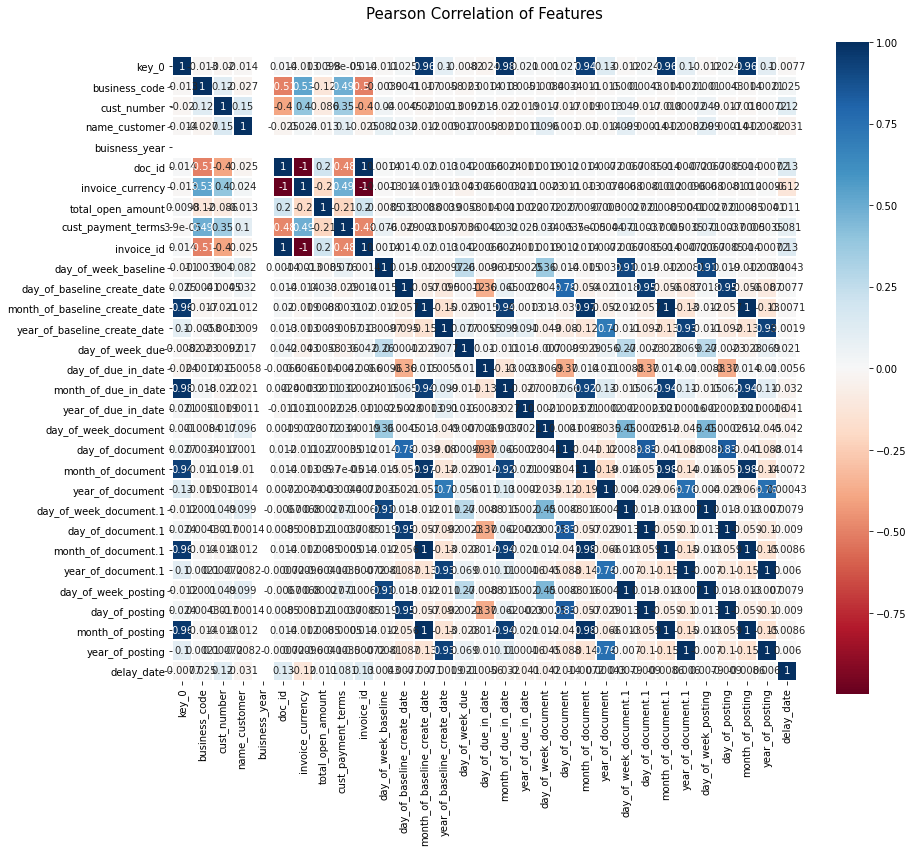

In [52]:
#Feature Selection

#corrmat = X_train.merge(y_train , on = X_train.index).corr()
# plt.subplots(figsize=(12,9))
# sns.heatmap(corrmat, vmax=0.9, square=True)


colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [53]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.6)
sel.fit(X_train)

VarianceThreshold(threshold=0.6)

In [54]:
sel.variances_

array([2.87002322e-01, 6.67552735e+04, 1.69332162e+06, 0.00000000e+00,
       7.57754137e+16, 7.13474944e-02, 1.59832218e+09, 1.59985570e+02,
       7.57754137e+16, 3.33752572e+00, 7.93977060e+01, 7.06508946e+00,
       3.45253019e-03, 3.51015817e+00, 7.54223681e+01, 7.18284660e+00,
       1.78582909e-04, 3.24902365e+00, 7.78399179e+01, 7.09693010e+00,
       5.57609885e-03, 3.29002179e+00, 7.77717322e+01, 7.05757539e+00,
       3.48799827e-03, 3.29002179e+00, 7.77717322e+01, 7.05757539e+00,
       3.48799827e-03])

In [55]:
X_train,X_val ,X_test = thanos_snap(['buisness_year'])#  buisness_year is a constant column hence should be dropped

In [56]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 27997
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_code                  27998 non-null  int32  
 1   cust_number                    27998 non-null  int32  
 2   name_customer                  27998 non-null  int32  
 3   doc_id                         27998 non-null  float64
 4   invoice_currency               27998 non-null  int32  
 5   total_open_amount              27998 non-null  float64
 6   cust_payment_terms             27998 non-null  int32  
 7   invoice_id                     27998 non-null  float64
 8   day_of_week_baseline           27998 non-null  int64  
 9   day_of_baseline_create_date    27998 non-null  int64  
 10  month_of_baseline_create_date  27998 non-null  int64  
 11  year_of_baseline_create_date   27998 non-null  int64  
 12  day_of_week_due                27998 non-null 

# MILESTONE 3

## BASE MODEL

In [57]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_predict = base_model.predict(X_val)

In [59]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

6.018320249371447

In [60]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [61]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

### TREE BASED MODEL

In [62]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [63]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [64]:
y_predict2 = regressor.predict(X_val)

In [65]:
mean_squared_error(y_val, y_predict2, squared=False)

6.054972529454653

In [66]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.413752789477897

### CLEARING DATA AS NULL

In [67]:
real_test #the dataset with the clear_date as null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,1,409,1693,NaN,2020.0,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,1,RV,1.0,5983.36,20200427.0,25,1.930832e+09,1
6,1,409,1695,NaN,2020.0,1.930832e+09,2020-04-29,20200428,20200429,20200514.0,1,RV,1.0,17360.34,20200429.0,25,1.930832e+09,1
7,1,409,1696,NaN,2020.0,1.930638e+09,2020-03-13,20200311,20200313,20200328.0,1,RV,1.0,63868.67,20200313.0,25,1.930638e+09,1
8,1,409,1700,NaN,2020.0,1.930794e+09,2020-04-17,20200416,20200417,20200502.0,1,RV,1.0,14095.14,20200417.0,25,1.930794e+09,1
12,1,375,1364,NaN,2020.0,1.930741e+09,2020-04-03,20200403,20200403,20200418.0,1,RV,1.0,16815.20,20200403.0,13,1.930741e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,1,317,1227,NaN,2020.0,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,1,RV,1.0,49770.76,20200415.0,13,1.930794e+09,1
49963,1,314,1737,NaN,2020.0,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,1,RV,1.0,35304.38,20200506.0,13,1.930867e+09,1
49977,1,372,1579,NaN,2020.0,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,1,RV,1.0,4038.33,20200423.0,13,1.930814e+09,1
49983,1,251,62,NaN,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,1,RV,1.0,42708.70,20200420.0,13,1.930801e+09,1


In [68]:
real_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

#### NULL / CONSTANT DROPPING

In [69]:
#DATA PRE-PROCESSING
X_real_test = real_test.drop(['clear_date'],axis=1)
X_real_test




,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,1,409,1693,2020.0,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,1,RV,1.0,5983.36,20200427.0,25,1.930832e+09,1
6,1,409,1695,2020.0,1.930832e+09,2020-04-29,20200428,20200429,20200514.0,1,RV,1.0,17360.34,20200429.0,25,1.930832e+09,1
7,1,409,1696,2020.0,1.930638e+09,2020-03-13,20200311,20200313,20200328.0,1,RV,1.0,63868.67,20200313.0,25,1.930638e+09,1
8,1,409,1700,2020.0,1.930794e+09,2020-04-17,20200416,20200417,20200502.0,1,RV,1.0,14095.14,20200417.0,25,1.930794e+09,1
12,1,375,1364,2020.0,1.930741e+09,2020-04-03,20200403,20200403,20200418.0,1,RV,1.0,16815.20,20200403.0,13,1.930741e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49960,1,317,1227,2020.0,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,1,RV,1.0,49770.76,20200415.0,13,1.930794e+09,1
49963,1,314,1737,2020.0,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,1,RV,1.0,35304.38,20200506.0,13,1.930867e+09,1
49977,1,372,1579,2020.0,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,1,RV,1.0,4038.33,20200423.0,13,1.930814e+09,1
49983,1,251,62,2020.0,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,1,RV,1.0,42708.70,20200420.0,13,1.930801e+09,1


In [70]:
const_feature = []
uniq_val_count = []
unique_cols = dict()
for col in list(real_test.columns):
    uniq_val_count.append(real_test[col].nunique())
    if(real_test[col].nunique()==1):
        const_feature.append(col)
    
print('\n\n\nConstant Features are   :',const_feature)
print('\n\nALL FEATURES WITH UNIQUE VALUES : \n')
pd.DataFrame({'COLUMN NAMES':list(real_test.columns) ,'UNIQUE VALUES COUNT':uniq_val_count})

# Removing the constant feature
real_test=real_test.drop(columns=const_feature)




Constant Features are   : ['buisness_year', 'document type', 'posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



In [71]:
#FEATURE ENGINEERING 
X_real_test['document_create_date'] = pd.to_datetime(X_real_test['document_create_date'])
X_real_test['baseline_create_date'] = pd.to_datetime(X_real_test['baseline_create_date'])
X_real_test['due_in_date'] = pd.to_datetime(X_real_test['due_in_date'])
X_real_test['document_create_date.1'] = pd.to_datetime(X_real_test['document_create_date.1'])

X_real_test['posting_date'] = pd.to_datetime(X_real_test['posting_date'])


In [72]:
X_real_test['day_of_week_baseline'] = X_real_test['baseline_create_date'].dt.weekday 
X_real_test['day_of_baseline_create_date'] = X_real_test['baseline_create_date'].dt.day
X_real_test['month_of_baseline_create_date'] = X_real_test['baseline_create_date'].dt.month
X_real_test['year_of_baseline_create_date'] = X_real_test['baseline_create_date'].dt.year

In [73]:
X_real_test['day_of_week_posting'] = X_real_test['posting_date'].dt.weekday 
X_real_test['day_of_posting'] = X_real_test['posting_date'].dt.day
X_real_test['month_of_posting'] = X_real_test['posting_date'].dt.month
X_real_test['year_of_posting'] = X_real_test['posting_date'].dt.year

In [74]:
X_real_test['day_of_week_due'] = X_real_test['due_in_date'].dt.weekday 
X_real_test['day_of_due_in_date'] = X_real_test['due_in_date'].dt.day
X_real_test['month_of_due_in_date'] = X_real_test['due_in_date'].dt.month
X_real_test['year_of_due_in_date'] = X_real_test['due_in_date'].dt.year

In [75]:
X_real_test['day_of_week_document'] = X_real_test['document_create_date'].dt.weekday 
X_real_test['day_of_document'] = X_real_test['document_create_date'].dt.day
X_real_test['month_of_document'] = X_real_test['document_create_date'].dt.month
X_real_test['year_of_document'] = X_real_test['document_create_date'].dt.year

In [76]:
X_real_test['day_of_week_document.1'] = X_real_test['document_create_date.1'].dt.weekday 
X_real_test['day_of_document.1'] = X_real_test['document_create_date.1'].dt.day
X_real_test['month_of_document.1'] = X_real_test['document_create_date.1'].dt.month
X_real_test['year_of_document.1'] = X_real_test['document_create_date.1'].dt.year

In [77]:
X_real_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49997
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   business_code                  10000 non-null  int32         
 1   cust_number                    10000 non-null  int32         
 2   name_customer                  10000 non-null  int32         
 3   buisness_year                  10000 non-null  float64       
 4   doc_id                         10000 non-null  float64       
 5   posting_date                   10000 non-null  datetime64[ns]
 6   document_create_date           10000 non-null  datetime64[ns]
 7   document_create_date.1         10000 non-null  datetime64[ns]
 8   due_in_date                    10000 non-null  datetime64[ns]
 9   invoice_currency               10000 non-null  int32         
 10  document type                  10000 non-null  object        
 11  posting_id     

In [78]:
# deleting object/datetime counter parts
X_real_test.drop(['baseline_create_date','due_in_date','document_create_date','document_create_date.1','posting_date','document type','posting_id','isOpen'],inplace =True ,axis=1)

In [79]:
X_real_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'invoice_currency', 'total_open_amount', 'cust_payment_terms',
       'invoice_id', 'day_of_week_baseline', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_week_posting', 'day_of_posting', 'month_of_posting',
       'year_of_posting', 'day_of_week_due', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date', 'day_of_week_document',
       'day_of_document', 'month_of_document', 'year_of_document',
       'day_of_week_document.1', 'day_of_document.1', 'month_of_document.1',
       'year_of_document.1'],
      dtype='object')

In [80]:
X_train.columns

Index(['business_code', 'cust_number', 'name_customer', 'doc_id',
       'invoice_currency', 'total_open_amount', 'cust_payment_terms',
       'invoice_id', 'day_of_week_baseline', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_week_due', 'day_of_due_in_date', 'month_of_due_in_date',
       'year_of_due_in_date', 'day_of_week_document', 'day_of_document',
       'month_of_document', 'year_of_document', 'day_of_week_document.1',
       'day_of_document.1', 'month_of_document.1', 'year_of_document.1',
       'day_of_week_posting', 'day_of_posting', 'month_of_posting',
       'year_of_posting'],
      dtype='object')

In [81]:
X_real_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3 to 49997
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_code                  10000 non-null  int32  
 1   cust_number                    10000 non-null  int32  
 2   name_customer                  10000 non-null  int32  
 3   buisness_year                  10000 non-null  float64
 4   doc_id                         10000 non-null  float64
 5   invoice_currency               10000 non-null  int32  
 6   total_open_amount              10000 non-null  float64
 7   cust_payment_terms             10000 non-null  int32  
 8   invoice_id                     10000 non-null  float64
 9   day_of_week_baseline           10000 non-null  int64  
 10  day_of_baseline_create_date    10000 non-null  int64  
 11  month_of_baseline_create_date  10000 non-null  int64  
 12  year_of_baseline_create_date   10000 non-null 

In [82]:
X_real_test.drop(['buisness_year'],inplace =True ,axis=1) # deleting buisness_year

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27998 entries, 0 to 27997
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   business_code                  27998 non-null  int32  
 1   cust_number                    27998 non-null  int32  
 2   name_customer                  27998 non-null  int32  
 3   doc_id                         27998 non-null  float64
 4   invoice_currency               27998 non-null  int32  
 5   total_open_amount              27998 non-null  float64
 6   cust_payment_terms             27998 non-null  int32  
 7   invoice_id                     27998 non-null  float64
 8   day_of_week_baseline           27998 non-null  int64  
 9   day_of_baseline_create_date    27998 non-null  int64  
 10  month_of_baseline_create_date  27998 non-null  int64  
 11  year_of_baseline_create_date   27998 non-null  int64  
 12  day_of_week_due                27998 non-null 

In [84]:
final_result = regressor.predict(X_real_test)

In [85]:
final_result = pd.Series(final_result,name='delay')

In [86]:
real_test.reset_index(drop=True,inplace=True) # resetting the index of real test so that we can merge delay series with it

In [87]:
Final = real_test.merge(final_result , on = X_real_test.index )
Final#the delay is printed 

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,3,1,409,1693,NaN,1.930832e+09,2020-04-27,20200428,20200427,20200512.0,1,5983.36,20200427.0,25,1.930832e+09,1.319136
1,6,1,409,1695,NaN,1.930832e+09,2020-04-29,20200428,20200429,20200514.0,1,17360.34,20200429.0,25,1.930832e+09,1.319136
2,7,1,409,1696,NaN,1.930638e+09,2020-03-13,20200311,20200313,20200328.0,1,63868.67,20200313.0,25,1.930638e+09,1.319136
3,8,1,409,1700,NaN,1.930794e+09,2020-04-17,20200416,20200417,20200502.0,1,14095.14,20200417.0,25,1.930794e+09,1.319136
4,12,1,375,1364,NaN,1.930741e+09,2020-04-03,20200403,20200403,20200418.0,1,16815.20,20200403.0,13,1.930741e+09,0.175484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,1,317,1227,NaN,1.930794e+09,2020-04-15,20200416,20200415,20200430.0,1,49770.76,20200415.0,13,1.930794e+09,0.175484
9996,49963,1,314,1737,NaN,1.930867e+09,2020-05-06,20200506,20200506,20200521.0,1,35304.38,20200506.0,13,1.930867e+09,1.319136
9997,49977,1,372,1579,NaN,1.930814e+09,2020-04-23,20200422,20200423,20200508.0,1,4038.33,20200423.0,13,1.930814e+09,1.319136
9998,49983,1,251,62,NaN,1.930801e+09,2020-04-20,20200419,20200420,20200505.0,1,42708.70,20200420.0,13,1.930801e+09,0.175484


In [88]:
Final['delay'] = Final['delay'].astype(int) #changing the delay datatype from float to int

In [89]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key_0                   10000 non-null  int64  
 1   business_code           10000 non-null  int32  
 2   cust_number             10000 non-null  int32  
 3   name_customer           10000 non-null  int32  
 4   clear_date              0 non-null      object 
 5   doc_id                  10000 non-null  float64
 6   posting_date            10000 non-null  object 
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  float64
 10  invoice_currency        10000 non-null  int32  
 11  total_open_amount       10000 non-null  float64
 12  baseline_create_date    10000 non-null  float64
 13  cust_payment_terms      10000 non-null  int32  
 14  invoice_id              10000 non-null 

In [90]:
Final['due_in_date'] = pd.to_datetime(Final['due_in_date'],format='%Y%m%d')#converting the due_in_date from float to datetime format

In [91]:
#converting the prediction target clear_date to datetime format
Final['clear_date'] = pd.to_datetime(Final['clear_date'])
Final.dtypes

key_0                              int64
business_code                      int32
cust_number                        int32
name_customer                      int32
clear_date                datetime64[ns]
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date               datetime64[ns]
invoice_currency                   int32
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                 int32
invoice_id                       float64
delay                              int32
dtype: object

In [92]:
#calculating the clear_date from delay and due_in_date for each record
from datetime import timedelta
def find_invoice_clear_date(x):
    return x ['due_in_date'] + timedelta(days = x['delay'])
Final['clear_date'] = Final.apply(find_invoice_clear_date,axis=1)


In [93]:
Final['clear_date'] = pd.to_datetime(Final['clear_date']).dt.date# extracting date from datetime format

In [94]:
Final['clear_date'] ##the clear_date is printed

0       2020-05-13
1       2020-05-15
2       2020-03-29
3       2020-05-03
4       2020-04-18
           ...    
9995    2020-04-30
9996    2020-05-22
9997    2020-05-09
9998    2020-05-05
9999    2020-04-16
Name: clear_date, Length: 10000, dtype: object

## PREDICTED PAYMENT DATE

In [95]:
#the clear_date is printed by using the delay and due_in_date
#predicted payment date = CLEAR_DATE
Final

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,3,1,409,1693,2020-05-13,1.930832e+09,2020-04-27,20200428,20200427,2020-05-12,1,5983.36,20200427.0,25,1.930832e+09,1
1,6,1,409,1695,2020-05-15,1.930832e+09,2020-04-29,20200428,20200429,2020-05-14,1,17360.34,20200429.0,25,1.930832e+09,1
2,7,1,409,1696,2020-03-29,1.930638e+09,2020-03-13,20200311,20200313,2020-03-28,1,63868.67,20200313.0,25,1.930638e+09,1
3,8,1,409,1700,2020-05-03,1.930794e+09,2020-04-17,20200416,20200417,2020-05-02,1,14095.14,20200417.0,25,1.930794e+09,1
4,12,1,375,1364,2020-04-18,1.930741e+09,2020-04-03,20200403,20200403,2020-04-18,1,16815.20,20200403.0,13,1.930741e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,1,317,1227,2020-04-30,1.930794e+09,2020-04-15,20200416,20200415,2020-04-30,1,49770.76,20200415.0,13,1.930794e+09,0
9996,49963,1,314,1737,2020-05-22,1.930867e+09,2020-05-06,20200506,20200506,2020-05-21,1,35304.38,20200506.0,13,1.930867e+09,1
9997,49977,1,372,1579,2020-05-09,1.930814e+09,2020-04-23,20200422,20200423,2020-05-08,1,4038.33,20200423.0,13,1.930814e+09,1
9998,49983,1,251,62,2020-05-05,1.930801e+09,2020-04-20,20200419,20200420,2020-05-05,1,42708.70,20200420.0,13,1.930801e+09,0


In [101]:
Final['delay'].value_counts()

 0      5682
 1      3488
 3       691
-1        67
 8        35
 23       19
-31       17
 111       1
Name: delay, dtype: int64

In [102]:
#Bucketization
def bucketization(x):
    if x<0:
        return('(<0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [103]:
#Bucketizing the delay 
Final['DELAY BUCKET(DAYS)']= pd.Series([bucketization(x=Final['delay'][i])  for i in range(len(Final))])

## PREDICTED PAYMENT DATE AFTER BUCKETIZING

In [104]:
#THE FINAL MODEL
Final

,key_0,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,DELAY BUCKET(DAYS)
0,3,1,409,1693,2020-05-13,1.930832e+09,2020-04-27,20200428,20200427,2020-05-12,1,5983.36,20200427.0,25,1.930832e+09,1,(0-15) Days
1,6,1,409,1695,2020-05-15,1.930832e+09,2020-04-29,20200428,20200429,2020-05-14,1,17360.34,20200429.0,25,1.930832e+09,1,(0-15) Days
2,7,1,409,1696,2020-03-29,1.930638e+09,2020-03-13,20200311,20200313,2020-03-28,1,63868.67,20200313.0,25,1.930638e+09,1,(0-15) Days
3,8,1,409,1700,2020-05-03,1.930794e+09,2020-04-17,20200416,20200417,2020-05-02,1,14095.14,20200417.0,25,1.930794e+09,1,(0-15) Days
4,12,1,375,1364,2020-04-18,1.930741e+09,2020-04-03,20200403,20200403,2020-04-18,1,16815.20,20200403.0,13,1.930741e+09,0,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49960,1,317,1227,2020-04-30,1.930794e+09,2020-04-15,20200416,20200415,2020-04-30,1,49770.76,20200415.0,13,1.930794e+09,0,(0-15) Days
9996,49963,1,314,1737,2020-05-22,1.930867e+09,2020-05-06,20200506,20200506,2020-05-21,1,35304.38,20200506.0,13,1.930867e+09,1,(0-15) Days
9997,49977,1,372,1579,2020-05-09,1.930814e+09,2020-04-23,20200422,20200423,2020-05-08,1,4038.33,20200423.0,13,1.930814e+09,1,(0-15) Days
9998,49983,1,251,62,2020-05-05,1.930801e+09,2020-04-20,20200419,20200420,2020-05-05,1,42708.70,20200420.0,13,1.930801e+09,0,(0-15) Days
